### Постановка задачи

##### Цель: определить цену продажи

##### Исходные данные

- Минимальная цена конкурентов
- Максимальная цена конкурентов
- Список (20 значений) цен конкурентов в возрастающем порядке с заполнением меньшими ценами
- Средняя цена конкурентов
- Стандартное отклонение цен конкурентов
- Медиана цен конкурентов
- Признак снято с производства
- Цена последней продажи нашей компанией
- Число дней с момента последней продажи нашей компанией

In [1186]:
import pandas as pd

### Часть 1. Загрузка Данных

In [1187]:
data = pd.read_csv("prices-data-type-4.csv", sep=';')
data

,PMin,PMax,mu,sd,md,EOL,LOP,LSD,Y,CategoryID
0,75460.0,75460.0,75460.0,0.0,75460.0,1,46750.0,0,46750.00,3546
1,12174.0,26340.0,15256.3,5374.7,12174.0,0,49872.0,0,24200.04,3546
2,19440.0,75350.0,22941.3,12175.0,19440.0,0,44900.0,0,18000.00,3546
3,15120.0,21770.0,15799.4,1611.2,15120.0,0,25000.0,0,14000.04,3546
4,51574.0,75300.0,53926.3,5379.3,51574.0,0,48900.0,0,49000.02,3546
...,...,...,...,...,...,...,...,...,...,...
907,58245.0,79790.0,60714.2,5604.3,58245.0,0,61500.0,37,60140.00,3544
908,94080.0,115000.0,95702.0,5087.9,94080.0,0,93120.0,25,93120.00,3544
909,49950.0,53900.0,50290.5,1035.9,49950.0,1,25000.0,64,24250.00,3544
910,141108.0,141108.0,141108.0,0.0,141108.0,1,112900.0,76,109513.00,3544


### Часть 2. EDA

In [1188]:
data.describe()

,PMin,PMax,mu,sd,md,EOL,LOP,LSD,Y,CategoryID
count,9.120000e+02,9.120000e+02,9.120000e+02,912.000000,9.120000e+02,912.000000,9.120000e+02,912.000000,9.120000e+02,912.000000
mean,7.689157e+04,1.089093e+05,8.096831e+04,8376.639035,7.791334e+04,0.153509,7.359644e+04,159.338816,7.180850e+04,3544.951754
std,1.397254e+05,1.913570e+05,1.433468e+05,20002.803774,1.396863e+05,0.360675,1.440271e+05,181.494159,1.405335e+05,0.919288
min,2.850000e+03,6.979000e+03,4.635900e+03,0.000000,4.934500e+03,0.000000,3.050000e+03,0.000000,4.897411e+03,3544.000000
25%,9.005000e+03,1.601925e+04,1.145838e+04,1129.525000,1.083425e+04,0.000000,1.090000e+04,0.750000,1.169522e+04,3544.000000
50%,2.154000e+04,3.359900e+04,2.294010e+04,2787.450000,2.154000e+04,0.000000,2.229350e+04,90.000000,2.094528e+04,3545.000000
75%,9.432475e+04,1.210185e+05,9.652448e+04,6829.350000,9.432475e+04,0.000000,8.399000e+04,225.500000,8.027076e+04,3545.000000
max,1.183920e+06,1.562500e+06,1.202849e+06,150521.500000,1.183920e+06,1.000000,1.550000e+06,543.000000,1.550000e+06,3547.000000


In [1189]:
data.shape

(912, 10)

In [1190]:
data.empty

False

In [1191]:
nan_count = data.isna().sum()
nan_count

PMin          0
PMax          0
mu            0
sd            0
md            0
EOL           0
LOP           0
LSD           0
Y             0
CategoryID    0
dtype: int64

In [1192]:
import matplotlib.pyplot as plt

<Axes: >

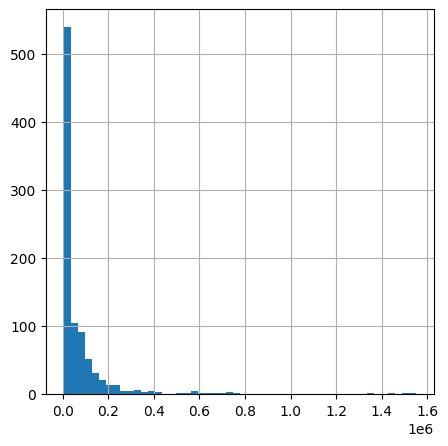

In [1193]:
data['Y'].hist(bins=50, figsize=(5, 5))

In [1194]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler

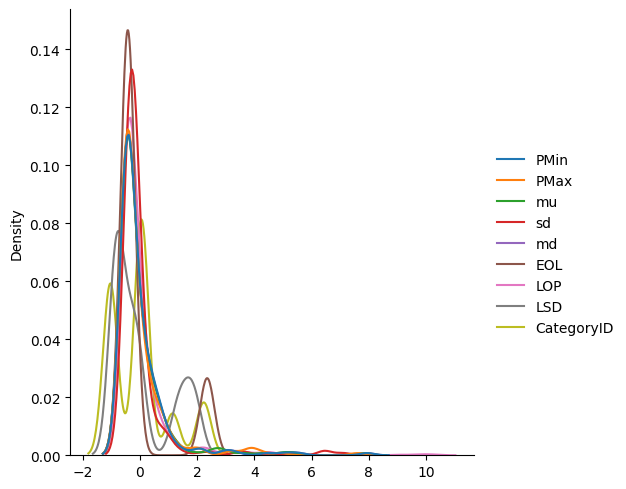

In [1195]:
sns.displot(pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns.tolist()).drop('Y', axis=1), kind="kde")

array([[<Axes: title={'center': 'PMin'}>,
        <Axes: title={'center': 'PMax'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'sd'}>, <Axes: title={'center': 'md'}>,
        <Axes: title={'center': 'EOL'}>],
       [<Axes: title={'center': 'LOP'}>, <Axes: title={'center': 'LSD'}>,
        <Axes: title={'center': 'CategoryID'}>]], dtype=object)

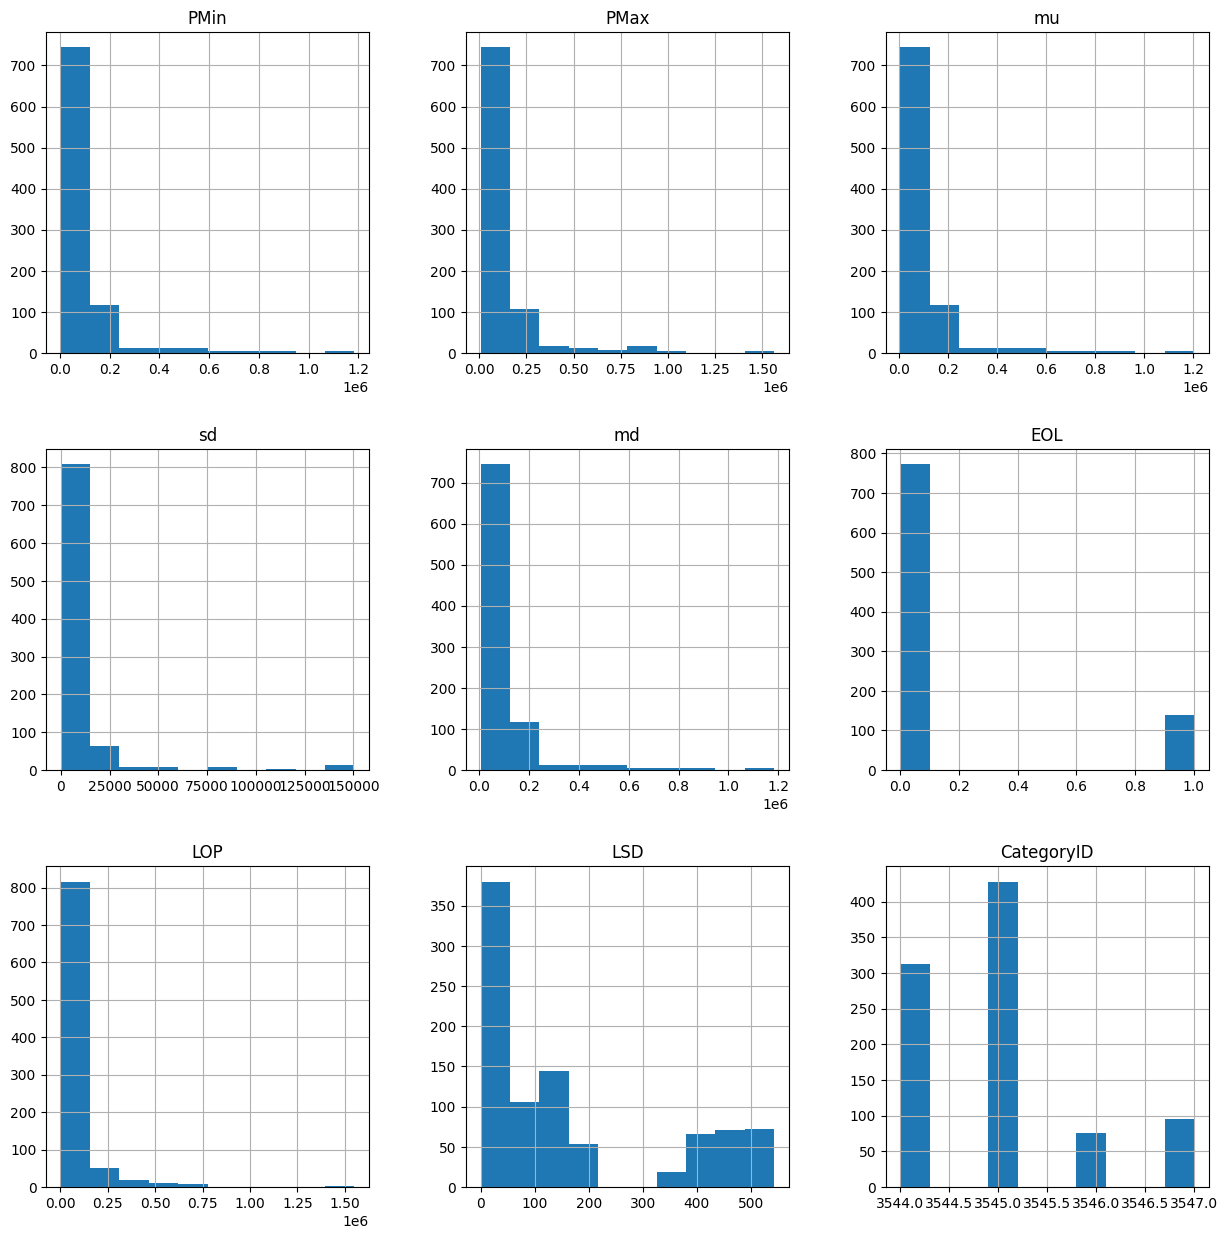

In [1196]:
data.drop('Y', axis=1).hist(figsize=(15, 15))

<Axes: >

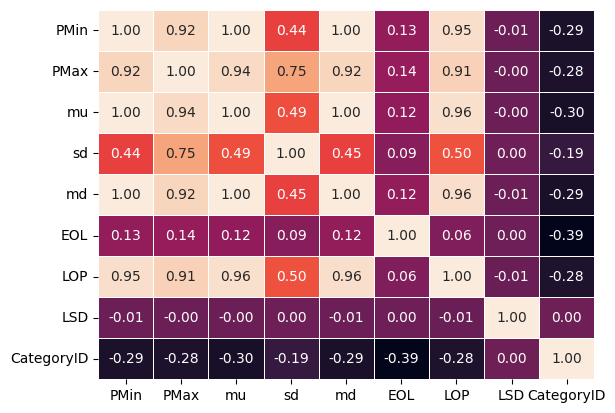

In [1197]:
sns.heatmap(data.drop('Y', axis=1).corr(), annot=True, cbar=False, linewidths=0.5, fmt='.2f')

In [1198]:
data = data.drop('PMax', axis=1)

In [1199]:
data = data.drop('PMin', axis=1) #.drop('mu', axis=1).drop('sd', axis=1)

<Axes: >

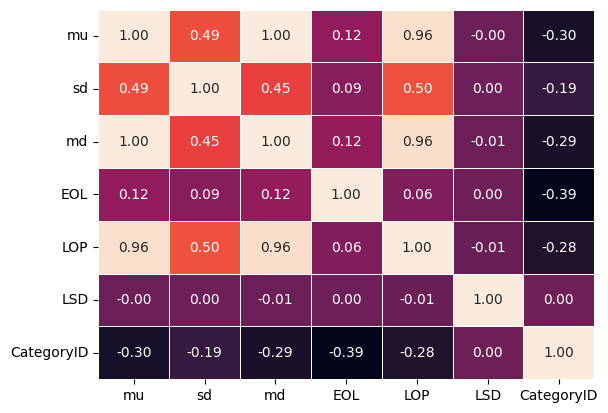

In [1200]:
sns.heatmap(data.drop('Y', axis=1).corr(), annot=True, cbar=False, linewidths=0.5, fmt='.2f')

In [1201]:
y = data.loc[:,'Y']
y

0       46750.00
1       24200.04
2       18000.00
3       14000.04
4       49000.02
         ...    
907     60140.00
908     93120.00
909     24250.00
910    109513.00
911     28130.00
Name: Y, Length: 912, dtype: float64

In [1202]:
data = data.drop("Y", axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mu          912 non-null    float64
 1   sd          912 non-null    float64
 2   md          912 non-null    float64
 3   EOL         912 non-null    int64  
 4   LOP         912 non-null    float64
 5   LSD         912 non-null    int64  
 6   CategoryID  912 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 50.0 KB


### Часть 3. LightGBM

[Базовая статья](https://www.geeksforgeeks.org/regression-using-lightgbm/#regression-model-using-lightgbm)

In [1203]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split 

In [1204]:

X_train, X_val, Y_train, Y_val = train_test_split(data, y, random_state=2024, test_size=0.30) 

In [1205]:
train_data = lgb.Dataset(X_train, label=Y_train)
test_data = lgb.Dataset(X_val, label=Y_val, reference=train_data) 

In [1206]:
params = { 
    'objective': 'regression', 
    'metric': 'rmse', 
    'boosting_type': 'gbdt', 
    'num_leaves': 100, 
    'learning_rate': 0.01, 
    'feature_fraction': 0.9,
    'verbose': -1
} 

In [1207]:
num_round = 1000
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

In [1208]:
import numpy as np
from sklearn.metrics import mean_squared_error as mse 

In [1209]:
from lightgbm import LGBMRegressor 

In [1210]:
model = LGBMRegressor(metric='rmse', num_leaves=500, learning_rate=0.35)

In [1211]:
model.fit(X_train, Y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 755
[LightGBM] [Info] Number of data points in the train set: 638, number of used features: 7
[LightGBM] [Info] Start training from score 75907.772005
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

LGBMRegressor(learning_rate=0.35, metric='rmse', num_leaves=500)

In [1212]:
y_train = model.predict(X_train) 
y_val = model.predict(X_val) 

In [1213]:
print("Training RMSE: ", np.sqrt(mse(Y_train, y_train))) 
print("Validation RMSE: ", np.sqrt(mse(Y_val, y_val)))

Training RMSE:  52106.05790520773
Validation RMSE:  21282.069069479094


In [1214]:
model.score(X_val, Y_val)

0.9426944300622766

### Часть 4. CatBoost

[Базовая статья](https://catboost.ai/en/docs/concepts/python-usages-examples)

In [1215]:
from catboost import CatBoostRegressor

In [1216]:
model = CatBoostRegressor()

In [1217]:
model.fit(X_train, Y_train)
y_train = model.predict(X_train)
y_val = model.predict(X_val)

Learning rate set to 0.038137
0:	learn: 153402.3458093	total: 2.14ms	remaining: 2.14s
1:	learn: 149745.3020129	total: 3.59ms	remaining: 1.79s
2:	learn: 146004.0764376	total: 5.86ms	remaining: 1.95s
3:	learn: 142448.1002964	total: 7.24ms	remaining: 1.8s
4:	learn: 138813.1323563	total: 8.72ms	remaining: 1.74s
5:	learn: 135192.5928292	total: 9.99ms	remaining: 1.66s
6:	learn: 131726.7141077	total: 11.3ms	remaining: 1.61s
7:	learn: 128680.4161246	total: 12.9ms	remaining: 1.6s
8:	learn: 125454.5007719	total: 14.5ms	remaining: 1.6s
9:	learn: 122265.0788244	total: 15.8ms	remaining: 1.57s
10:	learn: 119519.9766269	total: 17.2ms	remaining: 1.55s
11:	learn: 116604.4370482	total: 18.1ms	remaining: 1.49s
12:	learn: 113580.7016540	total: 20.1ms	remaining: 1.52s
13:	learn: 110681.4348609	total: 22.7ms	remaining: 1.6s
14:	learn: 107952.4382771	total: 24.5ms	remaining: 1.61s
15:	learn: 105395.3616341	total: 25.8ms	remaining: 1.59s
16:	learn: 102858.9025044	total: 27.1ms	remaining: 1.57s
17:	learn: 1004

In [1218]:
print("Training RMSE: ", np.sqrt(mse(Y_train, y_train))) 
print("Validation RMSE: ", np.sqrt(mse(Y_val, y_val)))

Training RMSE:  1251.4024419998584
Validation RMSE:  6988.0506683629355


In [1219]:
model.score(X_val, Y_val)

0.9938215259055225

### Часть 5. CatBoost. Другой набор данных

In [1220]:
data = pd.read_csv("prices-data-type-5.csv", sep=';')
data

,PMin,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P16,P17,P18,P19,PMax,CategoryID,EOL,LOP,LSD,Y
0,75460.0,75460.0,75460.0,75460.0,75460.0,75460.0,75460.0,75460.0,75460.0,75460.0,...,75460.0,75460.0,75460.0,75460.0,75460.0,3546,1,46750.0,0,46750.00
1,12174.0,12174.0,12174.0,12174.0,12174.0,12174.0,12174.0,12174.0,12174.0,12174.0,...,23031.0,23220.0,24725.0,25200.0,26340.0,3546,0,49872.0,0,24200.04
2,19440.0,19440.0,19440.0,19440.0,19440.0,19440.0,19440.0,19440.0,19440.0,19440.0,...,20420.0,21505.0,21780.0,27990.0,75350.0,3546,0,44900.0,0,18000.00
3,15120.0,15120.0,15120.0,15120.0,15120.0,15120.0,15120.0,15120.0,15120.0,15120.0,...,15120.0,17020.0,17078.0,18200.0,21770.0,3546,0,25000.0,0,14000.04
4,51574.0,51574.0,51574.0,51574.0,51574.0,51574.0,51574.0,51574.0,51574.0,51574.0,...,53900.0,56350.0,56520.0,59988.0,75300.0,3546,0,48900.0,0,49000.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,58245.0,58245.0,58245.0,58245.0,58245.0,58245.0,58245.0,58245.0,58245.0,58245.0,...,58245.0,63750.0,67650.0,71174.0,79790.0,3544,0,61500.0,37,60140.00
908,94080.0,94080.0,94080.0,94080.0,94080.0,94080.0,94080.0,94080.0,94080.0,94080.0,...,94080.0,94080.0,94080.0,105600.0,115000.0,3544,0,93120.0,25,93120.00
909,49950.0,49950.0,49950.0,49950.0,49950.0,49950.0,49950.0,49950.0,49950.0,49950.0,...,49950.0,49950.0,49950.0,52810.0,53900.0,3544,1,25000.0,64,24250.00
910,141108.0,141108.0,141108.0,141108.0,141108.0,141108.0,141108.0,141108.0,141108.0,141108.0,...,141108.0,141108.0,141108.0,141108.0,141108.0,3544,1,112900.0,76,109513.00


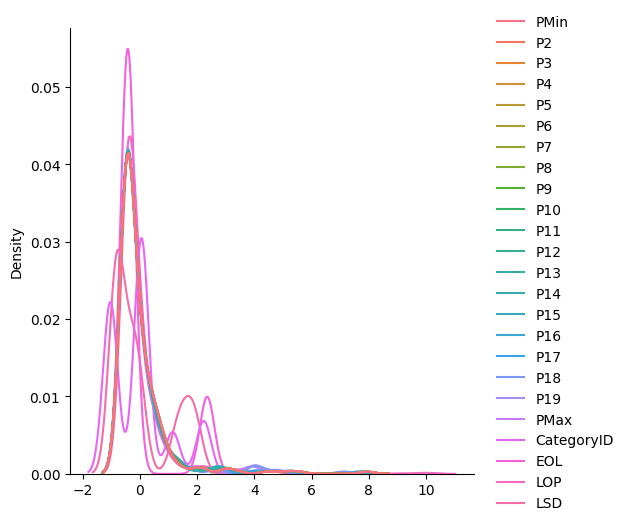

In [1221]:
sns.displot(pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns.tolist()).drop('Y', axis=1), kind="kde")

In [1222]:
import matplotlib.pyplot as plt

<Axes: >

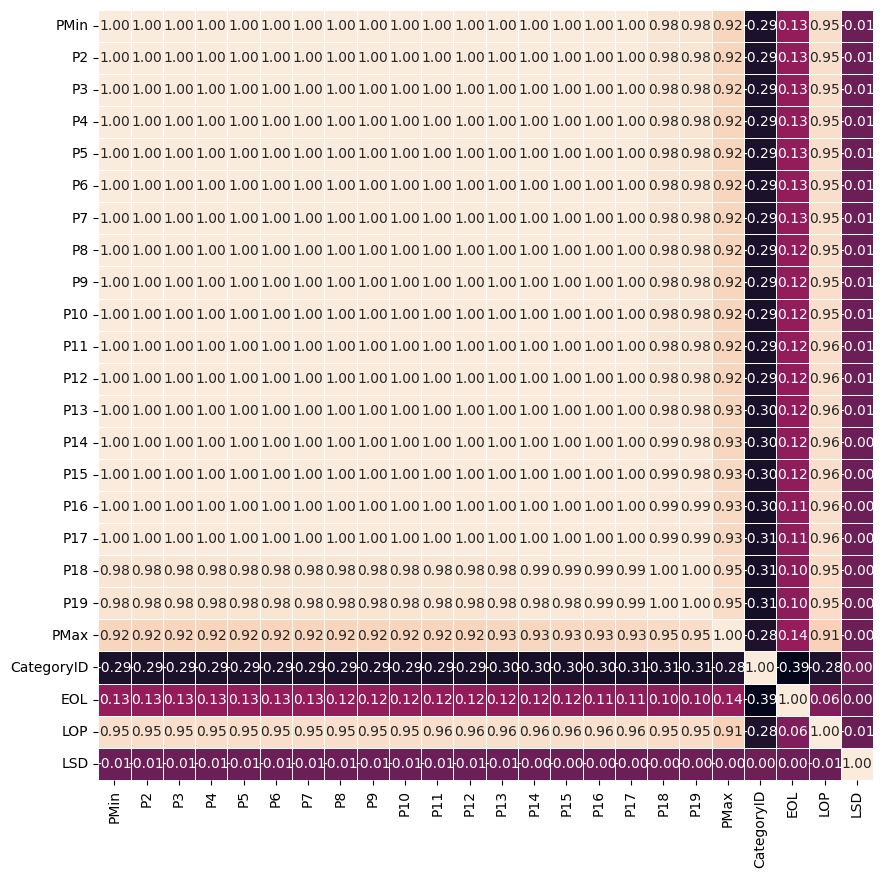

In [1223]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.drop('Y', axis=1).corr(), annot=True, cbar=False, linewidths=0.5, fmt='.2f', ax=ax)

In [1224]:
y = data.loc[:,'Y']
y

0       46750.00
1       24200.04
2       18000.00
3       14000.04
4       49000.02
         ...    
907     60140.00
908     93120.00
909     24250.00
910    109513.00
911     28130.00
Name: Y, Length: 912, dtype: float64

In [1225]:
data = data.drop("Y", axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PMin        912 non-null    float64
 1   P2          912 non-null    float64
 2   P3          912 non-null    float64
 3   P4          912 non-null    float64
 4   P5          912 non-null    float64
 5   P6          912 non-null    float64
 6   P7          912 non-null    float64
 7   P8          912 non-null    float64
 8   P9          912 non-null    float64
 9   P10         912 non-null    float64
 10  P11         912 non-null    float64
 11  P12         912 non-null    float64
 12  P13         912 non-null    float64
 13  P14         912 non-null    float64
 14  P15         912 non-null    float64
 15  P16         912 non-null    float64
 16  P17         912 non-null    float64
 17  P18         912 non-null    float64
 18  P19         912 non-null    float64
 19  PMax        912 non-null    f

In [1226]:
X_train, X_val, Y_train, Y_val = train_test_split(data, y, random_state=2024, test_size=0.30) 

In [1227]:
model = CatBoostRegressor()

In [1228]:
model.fit(X_train, Y_train)
y_train = model.predict(X_train)
y_val = model.predict(X_val)

Learning rate set to 0.038137
0:	learn: 153951.4798808	total: 4.18ms	remaining: 4.17s
1:	learn: 149879.4345834	total: 7.96ms	remaining: 3.97s
2:	learn: 146016.3397365	total: 12.7ms	remaining: 4.22s
3:	learn: 142305.1378225	total: 16.3ms	remaining: 4.07s
4:	learn: 138468.4084661	total: 20.7ms	remaining: 4.13s
5:	learn: 134881.2962051	total: 25.9ms	remaining: 4.29s
6:	learn: 131387.2587914	total: 29.3ms	remaining: 4.15s
7:	learn: 128025.5357603	total: 32.2ms	remaining: 3.99s
8:	learn: 124861.3505453	total: 35ms	remaining: 3.86s
9:	learn: 121672.1826409	total: 38.1ms	remaining: 3.77s
10:	learn: 118782.9337615	total: 41.8ms	remaining: 3.76s
11:	learn: 115803.4439821	total: 44.5ms	remaining: 3.67s
12:	learn: 112873.8155121	total: 47.1ms	remaining: 3.58s
13:	learn: 110026.7632894	total: 49.8ms	remaining: 3.51s
14:	learn: 107446.9591553	total: 52.6ms	remaining: 3.45s
15:	learn: 104846.6400499	total: 56.9ms	remaining: 3.5s
16:	learn: 102259.1346711	total: 59.8ms	remaining: 3.46s
17:	learn: 997

In [1229]:
print("Training RMSE: ", np.sqrt(mse(Y_train, y_train))) 
print("Validation RMSE: ", np.sqrt(mse(Y_val, y_val)))

Training RMSE:  1018.444582771387
Validation RMSE:  5394.608850278933


In [1230]:
model.score(X_val, Y_val)

0.996317955265271

### Часть 6. Нейронная сеть

In [1231]:
import torch
import torch.nn as nn

In [1232]:
def d_block(input_size, middle_size):
    return nn.Sequential(
            nn.Linear(input_size, middle_size),
            nn.ReLU(),
            nn.Linear(middle_size, middle_size),
            nn.ReLU(),
            nn.Linear(middle_size, 1)
        )

In [1233]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.d0 = d_block(7*1, 28)
        self.d1 = d_block(7*1, 28)
        self.d2 = d_block(7*1, 28)
        self.d3 = d_block(7*1, 28)
        self.d4 = d_block(7*1, 28)
        self.pr = nn.Sequential(
            nn.Linear(9, 18),
            nn.ReLU(),
            nn.Linear(18, 18),
            nn.ReLU(),
            nn.Linear(18, 1)
        )

    def forward(self, x):
        xd = torch.cat(
            x[0],
            x[1],
            x[2],
            x[3],
            self.d0(x[4:12]),
            self.d1(x[12:20]),
            self.d2(x[20:28]),
            self.d3(x[28:36]),
            self.d4(x[36:44]),
        )
        xp = self.pr(xd)
        return xp

In [1234]:
model = NeuralNetwork()
model

NeuralNetwork(
  (d0): Sequential(
    (0): Linear(in_features=7, out_features=28, bias=True)
    (1): ReLU()
    (2): Linear(in_features=28, out_features=28, bias=True)
    (3): ReLU()
    (4): Linear(in_features=28, out_features=1, bias=True)
  )
  (d1): Sequential(
    (0): Linear(in_features=7, out_features=28, bias=True)
    (1): ReLU()
    (2): Linear(in_features=28, out_features=28, bias=True)
    (3): ReLU()
    (4): Linear(in_features=28, out_features=1, bias=True)
  )
  (d2): Sequential(
    (0): Linear(in_features=7, out_features=28, bias=True)
    (1): ReLU()
    (2): Linear(in_features=28, out_features=28, bias=True)
    (3): ReLU()
    (4): Linear(in_features=28, out_features=1, bias=True)
  )
  (d3): Sequential(
    (0): Linear(in_features=7, out_features=28, bias=True)
    (1): ReLU()
    (2): Linear(in_features=28, out_features=28, bias=True)
    (3): ReLU()
    (4): Linear(in_features=28, out_features=1, bias=True)
  )
  (d4): Sequential(
    (0): Linear(in_features=7